# Network Analysis in Python

## Laila A. Wahedi
### Massive Data Institute Postdoctoral Fellow <br>McCourt School of Public Policy<br>

### Follow along: Wahedi.us, Current Presentation

# What is a network?
* Nodes/verticies
* links/edges/ties/arcs
* Also called a graph

### Any relationship or interaction 

# Examples
* People and friendships
* People and acquaintances
* People who shop at the same store
* People who live in the same zip code
* Stores that use the same distributor
* Movies with the same actors
* Words used in the same sentence

# Bipartite: Networks with two types of node

* Students and Mentors
* Stores and Distributors 

# Weighted: Networks with ties of different strength
* Twitter users and the number of retweets
* People and distance between homes
* Cities and the dollars of trade
* Cities and the number of travelers

# Directed Networks:
* An edge is not always symmetrical
 * Travel from one city to another
 * Sales from one country to another
 * Phone calls from one person to another
 * Twitter mentions

# Representing a network: Edge List

* Dyads
* Each row contains a pair of nodes indicating a tie
* A third column can indicate weight
* Order may indicate direction of the edge
<center>
Fred, Maria<br>
Fred, Samir<br>
Fred, Jose<br>
Samir, Jose<br>
Samir, Sonya<br>
Sonya, Maria<br>
</center>

# Representing a network: Adjacency Matrix
* nxn matrix of nodes, where position i,j indicates relationship between node i and node j
* Can be symmetrical or directed, use weights or indicators with 1
* Less space efficient for sparse networks, but convenient for linear algebra operations
<img src="adj.png">

# Your data:
---
## is there any relationship between your units of analysis?
* What are some examples?

# Packages for today: 
* NetworkX: network analysis package
* scipy, numpy, pandas: math and data frames
* itertools: Built in package for iterating
* Matplotlib: required for making plots
* Statsmodels to run regression

In [651]:
import pandas as pd
import networkx as nx
import numpy as np
import scipy as sp
import itertools
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

# Toy Network
* Instantiate
* Add nodes
* Add edges
* Draw

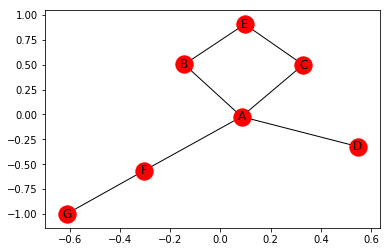

In [69]:
G = nx.Graph()
G.add_nodes_from(['A','B','C','D','E','F','G'])
G.add_edges_from([('A','B'),('A','C'),
                  ('A','D'),('A','F'),
                  ('B','E'),('C','E'),
                  ('F','G')])
nx.draw_networkx(G, with_labels=True)

# Centrality
* Way to measure the nature of the connectedness of a group
* Many centrality measures
* Use theory to pick one. 

#### Some common measures:

# Degree Centrality
* Number of ties
* Sum of rows
* In-degree: number of edges to a node
* Out-degree: number of edges from a node

In [45]:
deg = nx.degree_centrality(G)
print(deg)

{'A': 0.6666666666666666, 'B': 0.3333333333333333, 'C': 0.3333333333333333, 'D': 0.16666666666666666, 'E': 0.3333333333333333, 'F': 0.3333333333333333, 'G': 0.16666666666666666}


# Eigenvector Centrality
* Connectedness to other well-connected nodes
* Theoretical Implication: A lot of work to maintain ties to everyone, sometimes just as good to know someone who knows everyone.
 * Finding a job
 * Rumors
 * Supply

* Requires connected network
* Cannot compare across networks

### When might eigenvector centrality be less useful? 

# Calculating Eigenvector Centrality
* Take eigenvector for maximum eigenvalue
* nx.eigenvector_centrality uses a different method that usually converges to the same result, but sometimes errors. 

In [42]:
eig_c = nx.eigenvector_centrality_numpy(G)
toy_adj = nx.adjacency_matrix(G)
print(eig_c)
val,vec = np.linalg.eig(toy_adj.toarray())
print(val)
vec[:,0]

{'A': 0.5982414608737613, 'B': 0.4086581125324871, 'C': 0.40865811253248724, 'D': 0.25737830285751406, 'E': 0.3516296958052567, 'F': 0.3158377801038943, 'G': 0.1358812404989398}
[ 2.32436633e+00 -2.32436633e+00  1.14718388e+00  5.30368089e-01
 -1.14718388e+00 -5.30368089e-01 -4.25262560e-17]


array([-0.59824146, -0.40865811, -0.40865811, -0.2573783 , -0.3516297 ,
       -0.31583778, -0.13588124])

# Betweenness Centrality
* Proportional to the number of shortest paths that pass through a given node
* How important is that node in connecting other nodes
* Medicci family was not well connected, but strategically connected. 

In [43]:
betw = nx.betweenness_centrality(G)
print(betw)

{'A': 0.7666666666666666, 'B': 0.13333333333333333, 'C': 0.13333333333333333, 'D': 0.0, 'E': 0.03333333333333333, 'F': 0.3333333333333333, 'G': 0.0}


# Centrality Measures Are Different
* Select based on theory you want to capture
* Take a minute to play around with the network and see how the relationships change

In [48]:
cent_scores = pd.DataFrame({'deg':deg,'eig_c':eig_c,'betw':betw})
print(cent_scores.corr())
cent_scores

          betw       deg     eig_c
betw   1.00000  0.927450  0.796760
deg    0.92745  1.000000  0.931207
eig_c  0.79676  0.931207  1.000000


,betw,deg,eig_c
A,0.766667,0.666667,0.598241
B,0.133333,0.333333,0.408658
C,0.133333,0.333333,0.408658
D,0.000000,0.166667,0.257378
E,0.033333,0.333333,0.351630
F,0.333333,0.333333,0.315838
G,0.000000,0.166667,0.135881


# Transitivity
* Extent to which friends have friends in common
* Probability two nodes are tied given that they have a partner in common
* Make a more transitive network: 

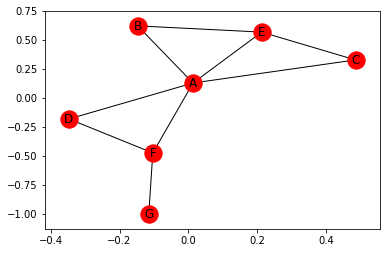

In [70]:
G_trans = G.copy()
G_trans.add_edge('A','E')
G_trans.add_edge('F','D')
nx.draw_networkx(G_trans, with_labels=True)

# Measure Transitivity
* Whole network: 
 * Transitivity: Proportion of possible triangles present in the network
* Individual nodes: 
 * Count the triangles

In [53]:
print("Transitivity:")
print(nx.transitivity(G))
print(nx.transitivity(G_trans))
print("Triangles:")
print(nx.triangles(G))
print(nx.triangles(G_trans))

Transitivity:
0
0.47368421052631576
Triangles:
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0}
{'A': 3, 'B': 1, 'C': 1, 'D': 1, 'E': 2, 'F': 1, 'G': 0}


# Clustering Coefficient
* Individual Nodes:
 * Proportion of possible triangles through a given node
* Whole Network
 * Average clustering across whole network

In [54]:
print("Clustering coefficient")
print(nx.clustering(G))
print(nx.clustering(G_trans))
print("Average Clustering")
print(nx.average_clustering(G))
print(nx.average_clustering(G_trans))

Clustering coefficient
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0}
{'A': 0.3, 'B': 1.0, 'C': 1.0, 'D': 1.0, 'E': 0.6666666666666666, 'F': 0.3333333333333333, 'G': 0}
Average Clustering
0.0
0.6142857142857142


# Community Detection
* Divide the network into subgroups using different algorithms
* Examples
 * Percolation: find communities with fully connected cores
 * Minimum cuts (nodes): Find the minimum number of nodes that, if removed,  break the network into multiple components. Progressively remove them. 
 * <strong>Girvan Newman Algorithm: </strong> Remove ties with highest betweenness, continue until network broken into desired number of communities 

In [76]:
coms = nx.algorithms.community.centrality.girvan_newman(G)
i = 2
for com in itertools.islice(coms,4):
    print(i, ' communities')
    i+=1
    print(tuple(c for c in com))

2  communities
({'D', 'E', 'B', 'C', 'A'}, {'G', 'F'})
3  communities
({'B', 'E', 'C', 'A'}, {'D'}, {'G', 'F'})
4  communities
({'C', 'A'}, {'B', 'E'}, {'D'}, {'G', 'F'})
5  communities
({'A'}, {'B', 'E'}, {'C'}, {'D'}, {'G', 'F'})


# Real Network: Senate co-sponsorship
* Nodes: Senators
* Links: Sponsorship of the same piece of legislation. 
* Weighted
<h4>Download here:</h4>
https://dataverse.harvard.edu/file.xhtml;jsessionid=e627083a7d8f43616bbe7d4ada3e?fileId=615937&version=RELEASED&version=.0
<h4> Start with the cosponsors.txt file</h4>
* Similar to an edgelist for a bipartite graph
 * Each line is a bill
 * Each line lists all cosponsors

<h1>Load The Cosponsor Data </h1>
<ol>
<li>Instantiate a list for the edgelist</li>
<li> Open the file</li>
<li> Loop through lines</li>
<li> Store the lines</li>
</ol>

In [229]:
edges = []
with open('cosponsors.txt') as d:
    for line in d:
        edges.append(line.split())

# Subset the Data: Year
<h3> 2004</h3>
* Download dates.txt
* Each row is the date
* Year, month, day separated by "-"

In [490]:
dates = pd.read_csv('Dates.txt',sep='-',header=None)
dates.columns = ['year','month','day']
index_loc = np.where(dates.year==2004)
edges_04 = [edges[i] for i in index_loc[0]]

# Subset the Data: Senate
* Download senate.csv
* Gives the ids for senators
* Filter down to the rows for 106th congress (2000)
<h3> This gives us our nodes </h3>
* Instantiate adjacency matrix of size nxn
* Create an ordinal index so we can index the matrix
* Add an attribute

In [505]:
# Get nodes
senate = pd.read_csv('senate.csv')
senators = senate.loc[senate.congress==108,['id','party']]
# Creae adjacency matrix
adj_mat = np.zeros([len(senators),len(senators)])
senators = pd.DataFrame(senators)
senators['adj_ind']=range(len(senators))
# Create Graph Object
senateG= nx.Graph()
senateG.add_nodes_from(senators.id)
party_dict = dict(zip(senators.id,senators.party))
nx.set_node_attributes(senateG, name='party',values=party_dict)

# Create the network (two ways)
* Loop through bills
* Check that there's data, and that it's a senate bill
* Create pairs for every combination of cosponsors
### Add directly to NetworkX graph object
* Add edges from the list of combinations
* Not weighted
### Add to adjacency matrix using new index
* Identify index for each pair
* Add to adjacency matrix using index

In [506]:
for bill in edges_04:
    if bill[0] == "NA": continue
    bill = [int(i) for i in bill]
    if bill[0] not in list(senators.id): continue
    combos = list(itertools.combinations(bill,2))
    senateG.add_edges_from(combos)
    for pair in combos:
        i = senators.loc[senators.id == int(pair[0]), 'adj_ind']
        j = senators.loc[senators.id == int(pair[1]), 'adj_ind']
        adj_mat[i,j]+=1
        adj_mat[j,i]+=1

# Set edge weights for Network Object


In [507]:
for row in range(len(adj_mat)):
    cols = np.where(adj_mat[row,:])[0]
    i = senators.loc[senators.adj_ind==row,'id']
    i = int(i)
    for col in cols:
        j = senators.loc[senators.adj_ind==col,'id']
        j = int(j)
        senateG[i][j]['bills']=adj_mat[row,col]

# Thresholding
* Some bills have everyone as a sponsor
* These popular bills are less informative, end up with complete network
* Threshold: Take edges above a certain weight (more than n cosponsorships)
* Try different numbers

In [697]:
bill_dict = nx.get_edge_attributes(senateG,'bills')
elarge=[(i,j) for (i,j) in bill_dict  if bill_dict[(i,j)] >40]

# Look at the network
* Different layouts possible: <br> https://networkx.github.io/documentation/networkx-1.10/reference/drawing.html

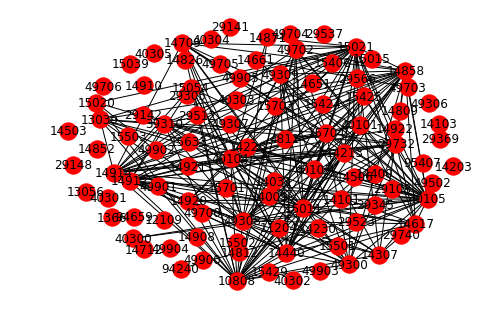

In [683]:
nx.draw_spring(senateG, edgelist = elarge,with_labels=True)

# Take out the singletons to get a clearer picture: 

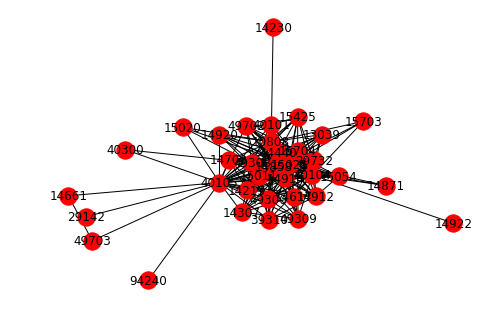

In [685]:
senateGt= nx.Graph()
senateGt.add_nodes_from(senateG.nodes)
senateGt.add_edges_from(elarge)
deg = senateGt.degree()
rem = [n[0] for n in deg if n[1]==0]
senateGt_all = senateGt.copy()
senateGt.remove_nodes_from(rem)
nx.draw_spring(senateGt,with_labels=True)

# Look at the degree distribution
* Degree is a tuple listing the group name and the number of partnerships
* Add to a dataframe
* Separate the column into two columns using .apply
* Plot a histogram

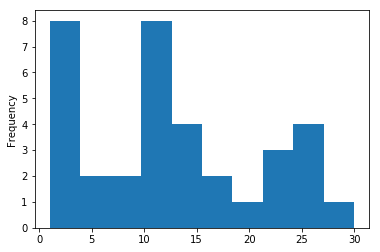

In [687]:
foo=pd.DataFrame({'tup':deg})
deg = senateGt.degree()
foo = pd.DataFrame(foo)
foo[['grp','deg']]=foo['tup'].apply(pd.Series)
foo.deg.plot.hist()

# Look at party in the network
### Extract the party information
* Democrats coded as 100, republicans as 200

In [698]:
party = nx.get_node_attributes(senateG,'party')
dems = []
gop = []
for i in party:
    if party[i]==100: dems.append(i)
    else: gop.append(i)

## Prepare the Visualization 
* Create positional coordinates for the groups with ties, and without ties
* Instantiate dictionaries to hold different sets of coordinates
* Loop through party members
 * If they have no parters, add calculated position to the lonely dictionary
 * If they have partners, add calculated position to the party dictionary

In [699]:
pos = nx.spring_layout(senateGt)
pos_all = nx.circular_layout(senateG)
dem_dict={}
gop_dict={}
dem_lone = {}
gop_lone= {}
for n in dems:
    if n in rem: dem_lone[n]=pos_all[n]
    else:dem_dict[n] = pos[n]
for n in gop:
    if n in rem: gop_lone[n]=pos_all[n]
    else:gop_dict[n] = pos[n]

## Visualize the network by party
* Create lists of the party members who have ties
* Draw nodes in four categories using the position dictionaries we created
 * party members, untied party members


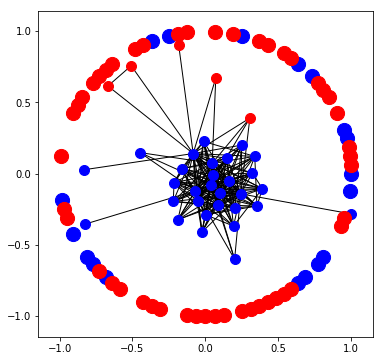

In [691]:
dems = list(set(dems)-set(rem))
gop = list(set(gop)-set(rem))
nx.draw_networkx_nodes(senateGt, pos=dem_dict, nodelist = dems,node_color='b',node_size = 100)
nx.draw_networkx_nodes(senateGt, pos=gop_dict, nodelist = gop,node_color='r', node_size = 100)
nx.draw_networkx_nodes(senateG, pos=dem_lone, nodelist = list(dem_lone.keys()),node_color='b',node_size = 200)
nx.draw_networkx_nodes(senateG, pos=gop_lone, nodelist = list(gop_lone.keys()),node_color='r', node_size = 200)
nx.draw_networkx_edges(senateGt,pos=pos, edgelist=elarge)

# Do it again with a lower threshold:

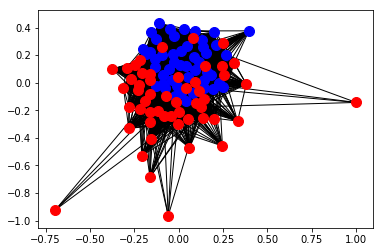

In [696]:
dems = list(set(dems)-set(rem))
gop = list(set(gop)-set(rem))
nx.draw_networkx_nodes(senateGt, pos=dem_dict, nodelist = dems,node_color='b',node_size = 100)
nx.draw_networkx_nodes(senateGt, pos=gop_dict, nodelist = gop,node_color='r', node_size = 100)
nx.draw_networkx_nodes(senateGt_all, pos=dem_lone, nodelist = list(dem_lone.keys()),node_color='b',node_size = 100)
nx.draw_networkx_nodes(senateGt_all, pos=gop_lone, nodelist = list(gop_lone.keys()),node_color='r', node_size = 100)
nx.draw_networkx_edges(senateGt,pos=pos, edgelist=elarge)

# Modularity: 
### fraction of edges within a community minus the expected fraction if they were distributed randomly across the whole network
* High modularity >0 when there are more connections in a community than between communities
* Different algorithms to try to maximize this. 
* Used a newer one from NetworkX. Run cell at end of notebook to get this algorithm

In [577]:
colors = greedy_modularity_communities(senateGt, weight = 'bills')

# Visualize the Communities
* Calculate a position for all nodes
* Separate network by the communities 
* Draw the first set as red
* Draw the second set as blue
* Add the edges

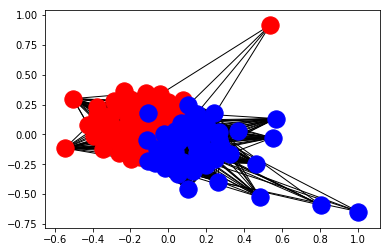

In [579]:
pos = nx.spring_layout(senateGt)
pos0={}
pos1={}
for n in colors[0]:
    pos0[n] = pos[n]
for n in colors[1]:
    pos1[n] = pos[n]
nx.draw_networkx_nodes(senateGt, pos=pos0, nodelist = colors[0],node_color='r')
nx.draw_networkx_nodes(senateGt, pos=pos1, nodelist = colors[1],node_color='b')
nx.draw_networkx_edges(senateGt,pos=pos, edgelist=elarge)

# How did we do? 
### How many were misclassified
* Note: It's random, so you may need to flip the comparison by switching colors[0] and colors[1]
#### Did pretty well!

In [596]:
print('gop misclassification')
for i in colors[1]:
    if i in dems: print(i,len(senateGt[i]))
print('dem misclassification')
for i in colors[0]: 
    if i in gop: print(i,len(senateGt[i]))

gop misclassification
14858 92
49300 94
49308 94
29732 93
49702 94
15704 96
49904 87
14709 94
dem misclassification
94240 71
49703 88
49705 89
29740 48
14910 81
15039 61
94659 4
14661 82
14826 25
49905 63
49903 75
14712 75


# Pretty, but now what?
### Structure is interesting itself
* Is polarization changing over time?
* What attributes of a senator or environment lead to more in-party cosponsorship. 
* Use ERGM or Latent Space Model
 * Beyond what we'll cover today, but check out: 
 * Edward's implementation of Latent Space Models: http://edwardlib.org/tutorials/latent-space-models
 * Statnet's ERGM implementation in R: https://statnet.org/trac/raw-attachment/wiki/Sunbelt2016/ergm_tutorial.html

# Those are hard, what else?
### Effects of networks
* How does a congressman's betweenness centrality affect their committee placement?
* How does a congressman's degree centrality affect their reelection?
* How does a party's modularity affect their ability to accomplish their agenda
* Does the behavior of tied nodes affect the behavior of a node? 
* Is there diffusion across the network? 

# Use Network Variables in Your Regression
* Control for centrality measures or other positional effects
* Party or community as unit of analysis
* Use network lags to account for interdependence (adapt a var or spatial lag model)
 * Remember, if you use spatial lags, you need to correct for it in your error term to get unbiased standard errors
 * p(y) conditional on y for neighboring nodes
 * Learn more here. Use your adjacency matrix for W instead of distance decay function.
 http://www.statsref.com/HTML/index.html?car_models.html

# Load some more data from Fowler
* SH file
* .tab or .csv, depending on source
* pb: sponsored bills passing chamber
* pa: sponsored ammendments passing chamber

In [632]:
sh = pd.read_csv('SH.tab',sep='\t')
sh['dem']= sh.party==100
sh['dem']=sh.dem*1
model_data = sh.loc[
    (sh.congress == 108) & (sh.chamber=='S'),
    ['ids','dem','pb','pa']
]
model_data['passed']=model_data.pb+model_data.pa
model_data.set_index('ids',inplace=True)

# Merge in some network data
* Remember: The merge works because they have the same index

In [633]:
bet_cent = nx.betweenness_centrality(senateG,weight='bills')
bet_cent = pd.Series(bet_cent)
deg_cent = nx.degree_centrality(senateGt)
deg_cent = pd.Series(deg_cent)
model_data['between']=bet_cent
model_data['degree']=deg_cent

# Degree is not significant

In [639]:
y =model_data.loc[:,'passed']
x =model_data.loc[:,['degree','dem']]
x['c'] = 1
ols_model1 = sm.OLS(y,x,missing='drop')
results = ols_model1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 passed   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.447
Date:                Thu, 01 Mar 2018   Prob (F-statistic):              0.240
Time:                        12:28:36   Log-Likelihood:                -423.33
No. Observations:                 100   AIC:                             852.7
Df Residuals:                      97   BIC:                             860.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
degree        -2.6260      8.137     -0.323      0.7

# Betweeness is!
## It's not how many bills that matter, it's who you cosponsor with

In [638]:
y =model_data.loc[:,'passed']
x =model_data.loc[:,['between','dem']]
x['c'] = 1
ols_model1 = sm.OLS(y,x,missing='drop')
results = ols_model1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 passed   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     5.727
Date:                Thu, 01 Mar 2018   Prob (F-statistic):            0.00446
Time:                        12:28:15   Log-Likelihood:                -419.22
No. Observations:                 100   AIC:                             844.4
Df Residuals:                      97   BIC:                             852.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
between      136.7902     47.131      2.902      0.0

# Questions? 

# Add functions from networkx
* NetworkX documentation is buggy
* Version that comes with Anaconda is incomplete
* Below I pasted a community detection function from their source code
* Don't worry about what it's doing, just run it to add

In [572]:
# Some functions from the NetworkX package

import heapq
class MappedQueue(object):
    """The MappedQueue class implements an efficient minimum heap. The
    smallest element can be popped in O(1) time, new elements can be pushed
    in O(log n) time, and any element can be removed or updated in O(log n)
    time. The queue cannot contain duplicate elements and an attempt to push an
    element already in the queue will have no effect.
    MappedQueue complements the heapq package from the python standard
    library. While MappedQueue is designed for maximum compatibility with
    heapq, it has slightly different functionality.
    Examples
    --------
    A `MappedQueue` can be created empty or optionally given an array of
    initial elements. Calling `push()` will add an element and calling `pop()`
    will remove and return the smallest element.
    >>> q = MappedQueue([916, 50, 4609, 493, 237])
    >>> q.push(1310)
    True
    >>> x = [q.pop() for i in range(len(q.h))]
    >>> x
    [50, 237, 493, 916, 1310, 4609]
    Elements can also be updated or removed from anywhere in the queue.
    >>> q = MappedQueue([916, 50, 4609, 493, 237])
    >>> q.remove(493)
    >>> q.update(237, 1117)
    >>> x = [q.pop() for i in range(len(q.h))]
    >>> x
    [50, 916, 1117, 4609]
    References
    ----------
    .. [1] Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2001).
       Introduction to algorithms second edition.
    .. [2] Knuth, D. E. (1997). The art of computer programming (Vol. 3).
       Pearson Education.
    """

    def __init__(self, data=[]):
        """Priority queue class with updatable priorities.
        """
        self.h = list(data)
        self.d = dict()
        self._heapify()

    def __len__(self):
        return len(self.h)

    def _heapify(self):
        """Restore heap invariant and recalculate map."""
        heapq.heapify(self.h)
        self.d = dict([(elt, pos) for pos, elt in enumerate(self.h)])
        if len(self.h) != len(self.d):
            raise AssertionError("Heap contains duplicate elements")

    def push(self, elt):
        """Add an element to the queue."""
        # If element is already in queue, do nothing
        if elt in self.d:
            return False
        # Add element to heap and dict
        pos = len(self.h)
        self.h.append(elt)
        self.d[elt] = pos
        # Restore invariant by sifting down
        self._siftdown(pos)
        return True

    def pop(self):
        """Remove and return the smallest element in the queue."""
        # Remove smallest element
        elt = self.h[0]
        del self.d[elt]
        # If elt is last item, remove and return
        if len(self.h) == 1:
            self.h.pop()
            return elt
        # Replace root with last element
        last = self.h.pop()
        self.h[0] = last
        self.d[last] = 0
        # Restore invariant by sifting up, then down
        pos = self._siftup(0)
        self._siftdown(pos)
        # Return smallest element
        return elt

    def update(self, elt, new):
        """Replace an element in the queue with a new one."""
        # Replace
        pos = self.d[elt]
        self.h[pos] = new
        del self.d[elt]
        self.d[new] = pos
        # Restore invariant by sifting up, then down
        pos = self._siftup(pos)
        self._siftdown(pos)

    def remove(self, elt):
        """Remove an element from the queue."""
        # Find and remove element
        try:
            pos = self.d[elt]
            del self.d[elt]
        except KeyError:
            # Not in queue
            raise
        # If elt is last item, remove and return
        if pos == len(self.h) - 1:
            self.h.pop()
            return
        # Replace elt with last element
        last = self.h.pop()
        self.h[pos] = last
        self.d[last] = pos
        # Restore invariant by sifting up, then down
        pos = self._siftup(pos)
        self._siftdown(pos)

    def _siftup(self, pos):
        """Move element at pos down to a leaf by repeatedly moving the smaller
        child up."""
        h, d = self.h, self.d
        elt = h[pos]
        # Continue until element is in a leaf
        end_pos = len(h)
        left_pos = (pos << 1) + 1
        while left_pos < end_pos:
            # Left child is guaranteed to exist by loop predicate
            left = h[left_pos]
            try:
                right_pos = left_pos + 1
                right = h[right_pos]
                # Out-of-place, swap with left unless right is smaller
                if right < left:
                    h[pos], h[right_pos] = right, elt
                    pos, right_pos = right_pos, pos
                    d[elt], d[right] = pos, right_pos
                else:
                    h[pos], h[left_pos] = left, elt
                    pos, left_pos = left_pos, pos
                    d[elt], d[left] = pos, left_pos
            except IndexError:
                # Left leaf is the end of the heap, swap
                h[pos], h[left_pos] = left, elt
                pos, left_pos = left_pos, pos
                d[elt], d[left] = pos, left_pos
            # Update left_pos
            left_pos = (pos << 1) + 1
        return pos

    def _siftdown(self, pos):
        """Restore invariant by repeatedly replacing out-of-place element with
        its parent."""
        h, d = self.h, self.d
        elt = h[pos]
        # Continue until element is at root
        while pos > 0:
            parent_pos = (pos - 1) >> 1
            parent = h[parent_pos]
            if parent > elt:
                # Swap out-of-place element with parent
                h[parent_pos], h[pos] = elt, parent
                parent_pos, pos = pos, parent_pos
                d[elt] = pos
                d[parent] = parent_pos
            else:
                # Invariant is satisfied
                break
        return pos
from __future__ import division

import networkx as nx
from networkx.algorithms.community.quality import modularity

def greedy_modularity_communities(G, weight=None):
    """Find communities in graph using Clauset-Newman-Moore greedy modularity
    maximization. This method currently supports the Graph class and does not
    consider edge weights.

    Greedy modularity maximization begins with each node in its own community
    and joins the pair of communities that most increases modularity until no
    such pair exists.

    Parameters
    ----------
    G : NetworkX graph

    Returns
    -------
    Yields sets of nodes, one for each community.

    Examples
    --------
    >>> from networkx.algorithms.community import greedy_modularity_communities
    >>> G = nx.karate_club_graph()
    >>> c = list(greedy_modularity_communities(G))
    >>> sorted(c[0])
    [8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

     References
    ----------
    .. [1] M. E. J Newman 'Networks: An Introduction', page 224
       Oxford University Press 2011.
    .. [2] Clauset, A., Newman, M. E., & Moore, C.
       "Finding community structure in very large networks."
       Physical Review E 70(6), 2004.
    """

    # Count nodes and edges
    N = len(G.nodes())
    m = sum([d.get('weight', 1) for u, v, d in G.edges(data=True)])
    q0 = 1.0 / (2.0*m)

    # Map node labels to contiguous integers
    label_for_node = dict((i, v) for i, v in enumerate(G.nodes()))
    node_for_label = dict((label_for_node[i], i) for i in range(N))

    # Calculate degrees
    k_for_label = G.degree(G.nodes(), weight=weight)
    k = [k_for_label[label_for_node[i]] for i in range(N)]

    # Initialize community and merge lists
    communities = dict((i, frozenset([i])) for i in range(N))
    merges = []

    # Initial modularity
    partition = [[label_for_node[x] for x in c] for c in communities.values()]
    q_cnm = modularity(G, partition)

    # Initialize data structures
    # CNM Eq 8-9 (Eq 8 was missing a factor of 2 (from A_ij + A_ji)
    # a[i]: fraction of edges within community i
    # dq_dict[i][j]: dQ for merging community i, j
    # dq_heap[i][n] : (-dq, i, j) for communitiy i nth largest dQ
    # H[n]: (-dq, i, j) for community with nth largest max_j(dQ_ij)
    a = [k[i]*q0 for i in range(N)]
    dq_dict = dict(
        (i, dict(
            (j, 2*q0 - 2*k[i]*k[j]*q0*q0)
            for j in [
                node_for_label[u]
                for u in G.neighbors(label_for_node[i])]
            if j != i))
        for i in range(N))
    dq_heap = [
        MappedQueue([
            (-dq, i, j)
            for j, dq in dq_dict[i].items()])
        for i in range(N)]
    H = MappedQueue([
        dq_heap[i].h[0]
        for i in range(N)
        if len(dq_heap[i]) > 0])

    # Merge communities until we can't improve modularity
    while len(H) > 1:
        # Find best merge
        # Remove from heap of row maxes
        # Ties will be broken by choosing the pair with lowest min community id
        try:
            dq, i, j = H.pop()
        except IndexError:
            break
        dq = -dq
        # Remove best merge from row i heap
        dq_heap[i].pop()
        # Push new row max onto H
        if len(dq_heap[i]) > 0:
            H.push(dq_heap[i].h[0])
        # If this element was also at the root of row j, we need to remove the
        # dupliate entry from H
        if dq_heap[j].h[0] == (-dq, j, i):
            H.remove((-dq, j, i))
            # Remove best merge from row j heap
            dq_heap[j].remove((-dq, j, i))
            # Push new row max onto H
            if len(dq_heap[j]) > 0:
                H.push(dq_heap[j].h[0])
        else:
            # Duplicate wasn't in H, just remove from row j heap
            dq_heap[j].remove((-dq, j, i))
        # Stop when change is non-positive
        if dq <= 0:
            break

        # Perform merge
        communities[j] = frozenset(communities[i] | communities[j])
        del communities[i]
        merges.append((i, j, dq))
        # New modularity
        q_cnm += dq
        # Get list of communities connected to merged communities
        i_set = set(dq_dict[i].keys())
        j_set = set(dq_dict[j].keys())
        all_set = (i_set | j_set) - set([i, j])
        both_set = i_set & j_set
        # Merge i into j and update dQ
        for k in all_set:
            # Calculate new dq value
            if k in both_set:
                dq_jk = dq_dict[j][k] + dq_dict[i][k]
            elif k in j_set:
                dq_jk = dq_dict[j][k] - 2.0*a[i]*a[k]
            else:
                # k in i_set
                dq_jk = dq_dict[i][k] - 2.0*a[j]*a[k]
            # Update rows j and k
            for row, col in [(j, k), (k, j)]:
                # Save old value for finding heap index
                if k in j_set:
                    d_old = (-dq_dict[row][col], row, col)
                else:
                    d_old = None
                # Update dict for j,k only (i is removed below)
                dq_dict[row][col] = dq_jk
                # Save old max of per-row heap
                if len(dq_heap[row]) > 0:
                    d_oldmax = dq_heap[row].h[0]
                else:
                    d_oldmax = None
                # Add/update heaps
                d = (-dq_jk, row, col)
                if d_old is None:
                    # We're creating a new nonzero element, add to heap
                    dq_heap[row].push(d)
                else:
                    # Update existing element in per-row heap
                    dq_heap[row].update(d_old, d)
                # Update heap of row maxes if necessary
                if d_oldmax is None:
                    # No entries previously in this row, push new max
                    H.push(d)
                else:
                    # We've updated an entry in this row, has the max changed?
                    if dq_heap[row].h[0] != d_oldmax:
                        H.update(d_oldmax, dq_heap[row].h[0])

        # Remove row/col i from matrix
        i_neighbors = dq_dict[i].keys()
        for k in i_neighbors:
            # Remove from dict
            dq_old = dq_dict[k][i]
            del dq_dict[k][i]
            # Remove from heaps if we haven't already
            if k != j:
                # Remove both row and column
                for row, col in [(k, i), (i, k)]:
                    # Check if replaced dq is row max
                    d_old = (-dq_old, row, col)
                    if dq_heap[row].h[0] == d_old:
                        # Update per-row heap and heap of row maxes
                        dq_heap[row].remove(d_old)
                        H.remove(d_old)
                        # Update row max
                        if len(dq_heap[row]) > 0:
                            H.push(dq_heap[row].h[0])
                    else:
                        # Only update per-row heap
                        dq_heap[row].remove(d_old)

        del dq_dict[i]
        # Mark row i as deleted, but keep placeholder
        dq_heap[i] = MappedQueue()
        # Merge i into j and update a
        a[j] += a[i]
        a[i] = 0

    communities = [
        frozenset([label_for_node[i] for i in c])
        for c in communities.values()]

    return sorted(communities, key=len, reverse=True)